## Problem Statement
We need to predict the chance of admission based on he student various scores .
--> __Feature or independent Variables

GRE Score

TOEFL Score

SOP

LOR

CGPA

Research

-->__Label/Target

Chance of Admission
Refer SKlearn official Documnetation if yor are sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [193]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [195]:
ad_data=pd.read_csv(r"C:\Users\sharm\Downloads\Admission_Predict500.csv")

In [197]:
ad_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,NaN,4.5,4.5,9.65,1,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3.0,316.0,104.0,NaN,3.0,3.5,8.00,1,0.72
3,4.0,NaN,NaN,3.0,3.5,2.5,8.67,1,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [199]:
ad_data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,NaN,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498.0,330.0,120.0,NaN,4.5,5.0,9.56,1,0.93
498,499.0,NaN,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500.0,327.0,113.0,NaN,4.5,4.5,9.04,0,0.84


In [201]:
#tells number of rows and columns in the csv file
ad_data.shape

(500, 9)

In [203]:
#information about the csv file
#the data has no missing value if the count matches the serial number
#this data has missing values as shown
ad_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,498.000000,496.000000,498.000000,496.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,249.514056,316.471774,107.182731,3.106855,3.374000,3.48400,8.576440,0.560000,0.72174
std,143.928766,11.301167,6.092244,1.143569,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.250000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,249.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,373.750000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [205]:
#as seen above there are missing values in GRE Score, TOEFL Score and University Rating

In [207]:
#filling the missing values

#we use mean here because they have continuous data
ad_data['GRE Score']=ad_data['GRE Score'].fillna(ad_data['GRE Score'].mean())
ad_data['TOEFL Score']=ad_data['TOEFL Score'].fillna(ad_data['TOEFL Score'].mean())

#we use mode here because university rating is categorical data
ad_data['University Rating']=data['University Rating'].fillna(ad_data['University Rating'].mode())

In [209]:
#checking to see if missing values are filled

In [211]:
ad_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.000000,118.000000,4,4.5,4.5,9.65,1,0.92
1,2.0,324.000000,107.000000,4,4.0,4.5,8.87,1,0.76
2,3.0,316.000000,104.000000,3,3.0,3.5,8.00,1,0.72
3,4.0,316.471774,107.182731,3,3.5,2.5,8.67,1,0.80
4,5.0,314.000000,103.000000,2,2.0,3.0,8.21,0,0.65


In [213]:
#filled missing values
ad_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,498.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,249.514056,316.471774,107.182731,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,143.928766,11.255781,6.080023,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.250000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,249.500000,316.735887,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,373.750000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now, the data looks good and there are no missing values. The first column just describes the serial number, so we don't need that column. Lets drop it form the data and make it more clean.

In [216]:
ad_data = ad_data.drop(columns=['Serial No.'])
ad_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.000000,4,4.5,4.5,9.65,1,0.92
1,324.000000,107.000000,4,4.0,4.5,8.87,1,0.76
2,316.000000,104.000000,3,3.0,3.5,8.00,1,0.72
3,316.471774,107.182731,3,3.5,2.5,8.67,1,0.80
4,314.000000,103.000000,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.000000,5,4.5,4.0,9.02,1,0.87
496,337.000000,117.000000,5,5.0,5.0,9.87,1,0.96
497,330.000000,120.000000,5,4.5,5.0,9.56,1,0.93
498,316.471774,103.000000,4,4.0,5.0,8.43,0,0.73


In [220]:
#other method to drop
del ad_data['Serial No.']
ad_data.head()

Lets visualize the data and analyze the relationship between independent and dependent variables

--> * Continuoues Data always form a normal distribution *

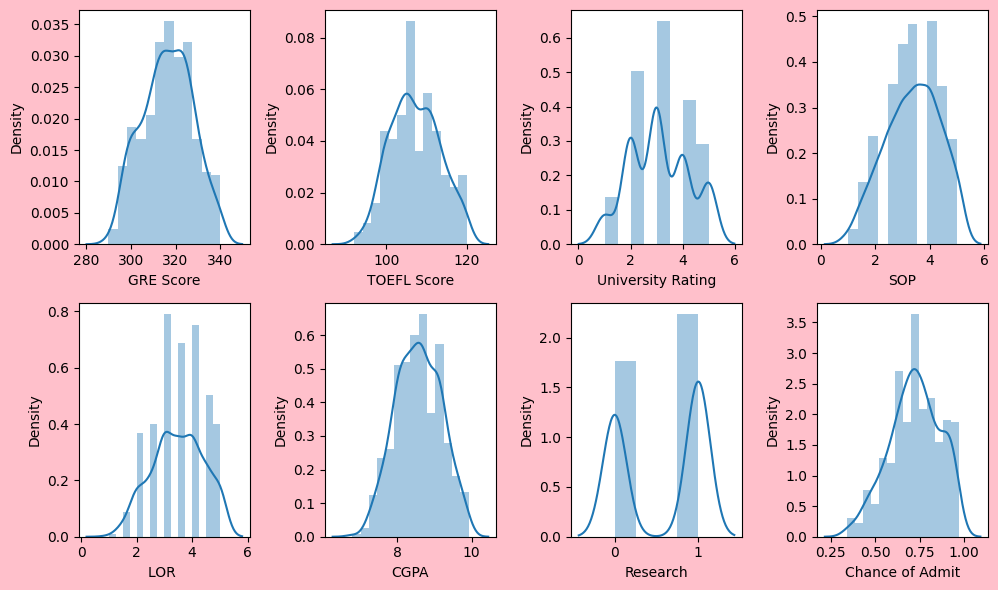

In [222]:
plt.figure(figsize=(10,6),facecolor='pink')
#Initializes the plot counter to 1
# tracks the current position for placing each plot in the grid of subplots.
plotnumber=1
#Loops through each column in ad_data DataFrame.
for column in ad_data:
    if plotnumber<=8:
        #Creates a 2x4 grid of subplots, placing the current plot at the correct position.
        ax=plt.subplot(2,4,plotnumber)
        #Plot histogram and KDE
        sns.distplot(ad_data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
#Adjusts subplot spacing to prevent overlap.
plt.tight_layout()

The data distribution looks decent enough and there doesnot sems to by any skeweness.

Great lets go ahead .Lets observe the relationship between indipendent and dependent variables.

In [225]:
#divide dataset into features(input) and labels(output)
y=ad_data['Chance of Admit']
x=ad_data.drop(columns=['Chance of Admit'])

In [227]:
print(y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64


In [229]:
print(x)

      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0    337.000000   118.000000                  4  4.5   4.5  9.65         1
1    324.000000   107.000000                  4  4.0   4.5  8.87         1
2    316.000000   104.000000                  3  3.0   3.5  8.00         1
3    316.471774   107.182731                  3  3.5   2.5  8.67         1
4    314.000000   103.000000                  2  2.0   3.0  8.21         0
..          ...          ...                ...  ...   ...   ...       ...
495  332.000000   108.000000                  5  4.5   4.0  9.02         1
496  337.000000   117.000000                  5  5.0   5.0  9.87         1
497  330.000000   120.000000                  5  4.5   5.0  9.56         1
498  316.471774   103.000000                  4  4.0   5.0  8.43         0
499  327.000000   113.000000                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]


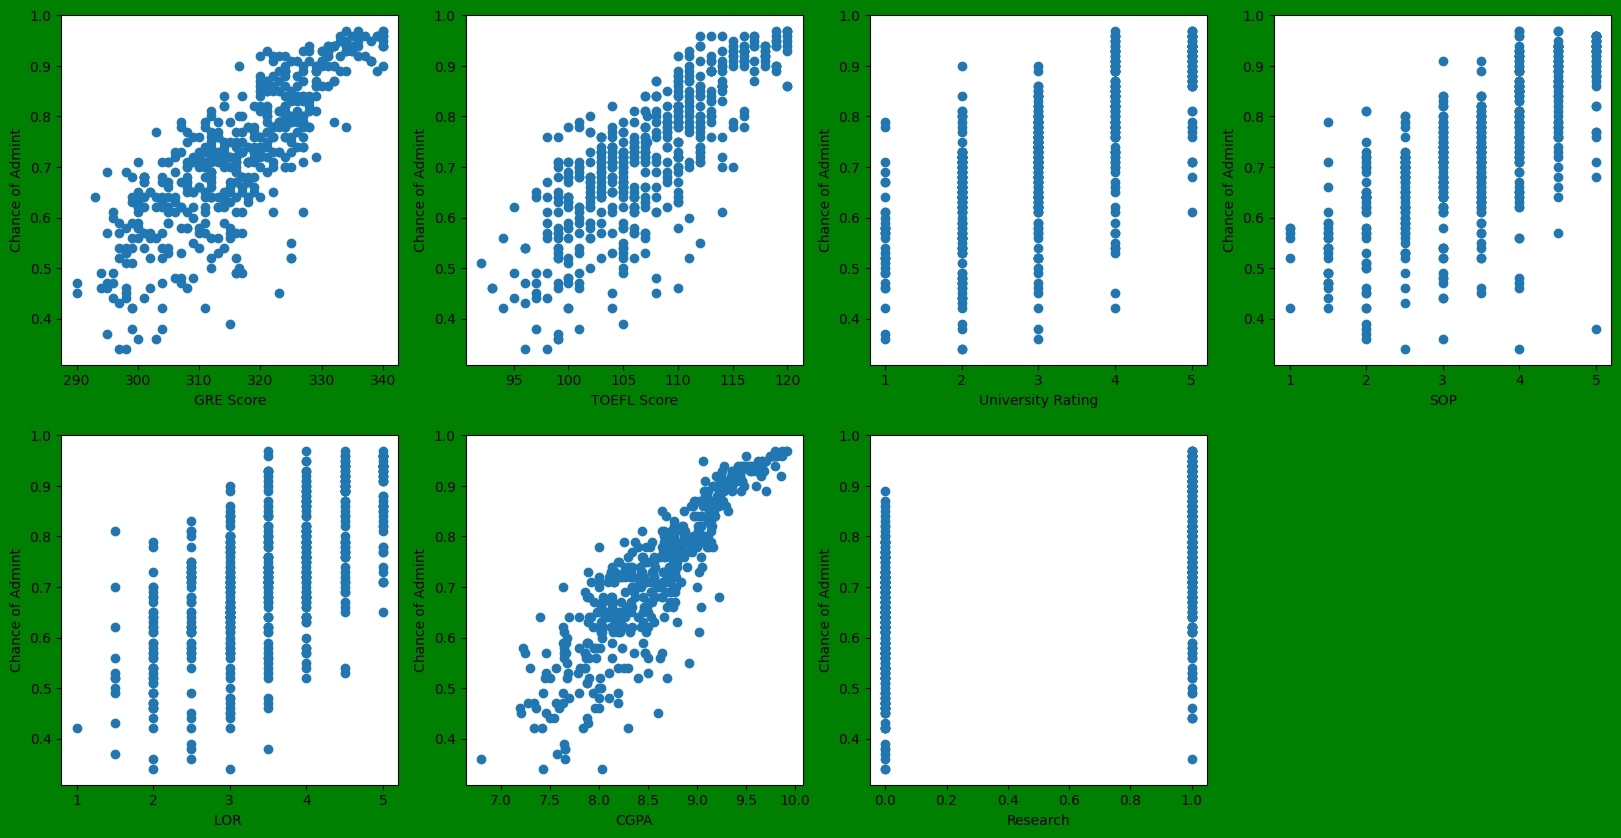

In [231]:
#visualizing relationship

plt.figure(figsize=(20,10),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=8:
       ax=plt.subplot(2,4,plotnumber)
       plt.scatter(x[column],y)
       plt.xlabel(column,fontsize=10)
       plt.ylabel('Chance of Admint',fontsize=10)
    plotnumber+=1
plt.show()

In [233]:
#We have check only there is relationship or not  

In [235]:
# Great, The relationship between the dependent variable and independent varible look fairly linear
# Thus, our linearly assumption is satisfied.

##### Standard Scaler:
A Standard Scaler is used to make the data unitless and standardize it. Standardization ensures that all features in the dataset are scaled to have a mean of 0 and a standard deviation of 1. This is especially important when features have different units, as it helps to bring all features onto a similar scale.

##### Why use a Standard Scaler?
Suppose we have features with different units, such as height in centimeters and weight in kilograms. If these features are not standardized, the feature with the larger numerical range (e.g., weight) might dominate the learning algorithm. To prevent this bias and ensure all features contribute equally to the model, we apply standardization.

##### Example:
Imagine you have four equally knowledgeable friends, but one friend is very close to you. If you only listen to that one friend and ignore the others, you are being biased. Similarly, in machine learning, we don't want to give one feature more importance than others simply because of its scale. By standardizing the features, we ensure that all features are treated equally and contribute equally to the model.

##### How Standard Scaler Works:
The Standard Scaler transforms the data using the following formula:

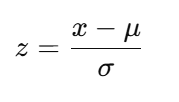

Where:

𝑥: Original feature value

𝜇: Mean of the feature

𝜎: Standard deviation of the feature

In [240]:
#data scaling formula given above:

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[ 1.82562061e+00  1.78093127e+00  7.75582141e-01 ...  1.09894429e+00
   1.77680627e+00  8.86405260e-01]
 [ 6.69501803e-01 -3.00844154e-02  7.75582141e-01 ...  1.09894429e+00
   4.85859428e-01  8.86405260e-01]
 [-4.19559244e-02 -5.23997784e-01 -9.97927360e-02 ...  1.73062093e-02
  -9.54042814e-01  8.86405260e-01]
 ...
 [ 1.20309510e+00  2.11020685e+00  1.65095702e+00 ...  1.63976333e+00
   1.62785086e+00  8.86405260e-01]
 [ 5.05521120e-15 -6.88635574e-01  7.75582141e-01 ...  1.63976333e+00
  -2.42366993e-01 -1.12815215e+00]
 [ 9.36298451e-01  9.57742323e-01  7.75582141e-01 ...  1.09894429e+00
   7.67219636e-01 -1.12815215e+00]]


Lets Go ahead and use linear regression and see how good it fits our data. But first lets split our data in training and testing set.

##### Train-Test Split:

To build a reliable machine learning model, we split the dataset into two parts:

Training Data: Used to train the model and help it learn patterns.
Test Data: Used to evaluate the model’s performance on unseen data.
This ensures the model is both trained and tested before deployment, avoiding bias and giving accurate performance metrics like accuracy or confidence.

##### Why Do We Split the Data?
We cannot use the entire dataset for training the model because then we wouldn't have any data left to test it. Testing is crucial to ensure the model performs well on unseen data and not just the data it was trained on. By splitting the dataset:

Training is for learning purposes.
Testing is for checking purposes.

##### Analogy: Just like students study the syllabus (training) and then take an exam to test their understanding, a model trains on one part of the data and is tested on another part to measure how well it has learned.

The train_test_split() function is used for this process.

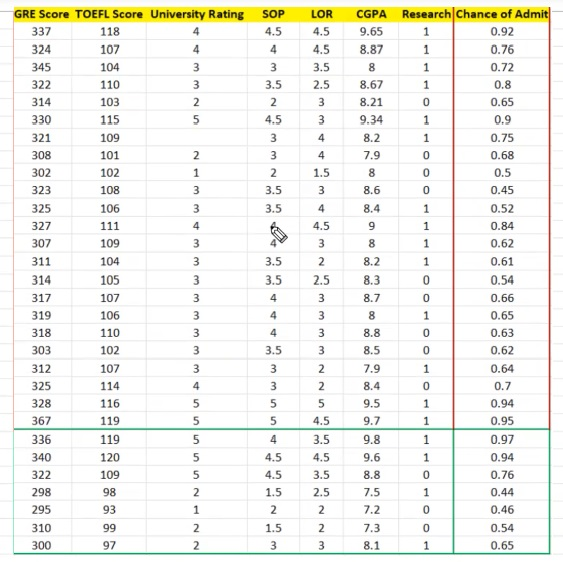

Let’s take an academic example: When I teach you in college, I provide you with both the questions and the answers to help you learn. This way, you are trained using both the questions and their solutions.

However, during a test, I only give you the questions and hide the answers.

In this scenario, you use the knowledge you’ve gained during training to predict the answers. Similarly, in machine learning, during testing, the model is given input data (questions) and is evaluated based on how accurately it predicts the outputs (answers or labels).

## How can we check it is Correct or Not
Compare the predicted answers with the hidden or actual answers. This is why we split the data into four parts, which is the exact same concept used here.

Every time in supervised machine learning, we use train_test_split from sklearn.model_selection.

## Split data into training and testing, model will be built on training data and tested on test set.

In [263]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.2,random_state=0)
y_train.head()

107    0.91
336    0.72
71     0.96
474    0.67
6      0.75
Name: Chance of Admit, dtype: float64

## Model Instantiating and Training

In [268]:
reg=LinearRegression()
lr=reg.fit(x_train,y_train)
lr

LinearRegression()

In [272]:
#Predict the chance of admission give feature
ad_data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,316.471774,103.0,4,4.0,5.0,8.43,0,0.73
499,327.000000,113.0,4,4.5,4.5,9.04,0,0.84


In [278]:
print("chance of admit: ",reg.predict(scaler.transform([[327,113,4,4.5,4.5,9.04,0]])))

chance of admit:  [0.82454727]


When we are learning, our model was learning. How did it learn? It learned on scaled data. So basically we convert our data to scaled data. When we have to scale the data, we only use scaler.transform.

## You can save the model and later you can use it for prediction

In [286]:
#Saving the model to the local file system 
#They Save in bit wise/binary
#wb=write binary
pickle.dump(reg,open( 'score_pred_model','wb'))

## How to load the Model

In [291]:
import pickle
#rb=read binary
model=pickle.load(open('score_pred_model','rb'))
model

LinearRegression()

In [295]:
prediction=model.predict(scaler.transform([[316,103,4,4,5,8.43,0]]))
prediction

array([0.71290923])

## Prediction using the saved model.

In [298]:
model

LinearRegression()

In [302]:
#input random values/features
prediction=model.predict(scaler.transform([[326,123,4,4,5,8.43,0]]))
prediction

array([0.78958152])

In [304]:
#Lets try in new window with only pickle model
scaler.transform([[326,123,4,4,5,8.43,0]])

array([[ 0.84736623,  2.60412022,  0.77558214,  0.63231549,  1.63976333,
        -0.24236699, -1.12815215]])

## Check how good in our model.

In [307]:
#Adjusted R2
#Training score: how good model understood the training data.
reg.score(x_train,y_train)

0.8310527002464578

In [311]:
#Testing score: how Well my model will understand testing data.
#Lets check how well model fits the test data
reg.score(x_test,y_test)

0.7671830139774048

Question: Why is your test score usually lower than your training score?

Answer: The training score is typically higher because the model has already seen the training data and, in some cases, may even memorize it. This means the model learns patterns specific to the training data, which results in a higher score.

On the other hand, the test data is new and unfamiliar to the model, as it has never seen this data before. As a result, the model may not perform as well, leading to a lower score on the test data compared to the training data.

## Let's Plot and Visualize

Now, I want to test the model. I will pass only x_test to the regression model, and it will generate predictions.

I also have the actual labels for the test data.

Next, I will compare the predicted data with the actual data.

The results will represent my model's confidence or how well my model performs.

In [315]:
y_pred=reg.predict(x_test)
y_pred

array([0.65919121, 0.8345674 , 0.778599  , 0.88072336, 0.60352405,
       0.64315945, 0.53168476, 0.69732997, 0.52564467, 0.74524508,
       0.60942539, 0.7084934 , 0.62086938, 0.7545438 , 0.88396616,
       0.50954809, 0.82425691, 0.6442429 , 0.76403847, 0.53384588,
       0.51620346, 0.72206937, 0.52148844, 0.9219516 , 0.83435046,
       0.72608784, 0.69776366, 0.50610848, 0.58195597, 0.59589144,
       0.72610135, 0.48535018, 0.6553961 , 0.84180187, 0.56256425,
       0.59943447, 0.84370722, 0.86818928, 0.59173115, 0.65972899,
       0.66895877, 0.90238464, 0.86592464, 0.72174371, 0.77262841,
       0.80651553, 0.97107041, 0.85135461, 0.64243228, 0.65463739,
       0.63218026, 0.63617676, 0.61339987, 0.80080453, 0.69539588,
       0.85548171, 0.52632888, 0.86358155, 0.60096201, 0.63685051,
       0.49931409, 0.90759759, 0.61925536, 0.94728478, 0.71880521,
       0.6164694 , 0.73463237, 0.84414933, 0.51945082, 0.77720026,
       0.89543774, 0.78310364, 0.69837017, 0.63924422, 0.79020

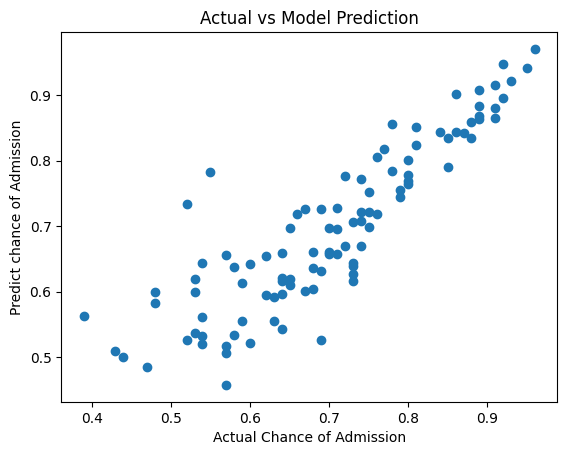

In [317]:
#plot actual vs predicted data
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

## Model Evaluation - Understanding the Metrics
##### R² (Coefficient of Determination): 
It shows how well the model's predictions match the actual data. If R² is close to 1, it means the model is doing a good job at explaining the data.

It tells you how much of the variation in the target variable can be explained by the model. A higher R² means a better fit.

Measures the proportion of the variance in the dependent variable that is predictable
from the independent variable(s).

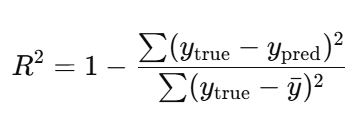

##### Adjusted R²: 
It improves R² by taking into account the number of features (variables) in the model. Adding more features can make R² look better, but Adjusted R² adjusts for this to give a more accurate measure of the model's performance.

It adjusts R² by considering the number of predictors, so it prevents overestimating the model's performance when adding more variables.

Adjusts R² for the number of predictors in the model, penalizing for adding irrelevant predictors.
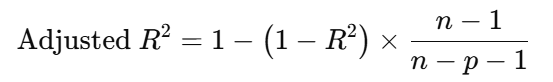

##### Mean Absolute Error (MAE):
This metric shows the average error made by the model. It is calculated by taking the absolute difference between the predicted and actual values for every data point and then finding the average of those differences.

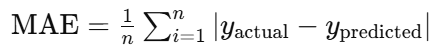

##### Mean Squared Error (MSE):
Similar to MAE, but the errors are squared before averaging. Squaring the errors makes larger errors have a bigger impact on the final value. Although MSE is harder to interpret because the results are not in the original units of the data, it is widely used because it emphasizes significant errors, which can be helpful if those errors are critical.
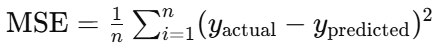

##### Root Mean Squared Error (RMSE):
RMSE is the most commonly used metric. It is similar to MSE, but by taking the square root of the result, the error is converted back into the original units of the data, making it easier to interpret. RMSE is often recommended as the primary metric for evaluating model performance.
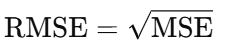

##### How Clients Interpret These Metrics:
When clients ask, "Tell me in a simple number how much error your model is going to make," they are asking for an overall measure of error across all records in your test data, not individual errors.

##### Key Point:

Error = Residual: Lower errors indicate better model performance.
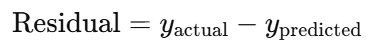

In [323]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [327]:
#predicted labels for testing set features
y_pred=reg.predict(x_test)
y_pred

array([0.65919121, 0.8345674 , 0.778599  , 0.88072336, 0.60352405,
       0.64315945, 0.53168476, 0.69732997, 0.52564467, 0.74524508,
       0.60942539, 0.7084934 , 0.62086938, 0.7545438 , 0.88396616,
       0.50954809, 0.82425691, 0.6442429 , 0.76403847, 0.53384588,
       0.51620346, 0.72206937, 0.52148844, 0.9219516 , 0.83435046,
       0.72608784, 0.69776366, 0.50610848, 0.58195597, 0.59589144,
       0.72610135, 0.48535018, 0.6553961 , 0.84180187, 0.56256425,
       0.59943447, 0.84370722, 0.86818928, 0.59173115, 0.65972899,
       0.66895877, 0.90238464, 0.86592464, 0.72174371, 0.77262841,
       0.80651553, 0.97107041, 0.85135461, 0.64243228, 0.65463739,
       0.63218026, 0.63617676, 0.61339987, 0.80080453, 0.69539588,
       0.85548171, 0.52632888, 0.86358155, 0.60096201, 0.63685051,
       0.49931409, 0.90759759, 0.61925536, 0.94728478, 0.71880521,
       0.6164694 , 0.73463237, 0.84414933, 0.51945082, 0.77720026,
       0.89543774, 0.78310364, 0.69837017, 0.63924422, 0.79020

In [329]:
#MAE
mae_score=mean_absolute_error(y_test,y_pred)
mae_score

0.048241177776896495

In [331]:
#MSE
mse_score=mean_squared_error(y_test,y_pred)
mse_score

0.0040660904566381184

In [335]:
#RMSE
rmse_score=np.sqrt(mse_score)
print(rmse_score)

0.06376590355854858


## Underfitting
Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both the training and test sets. It typically happens when the model has high bias and is not complex enough to learn from the data.

## Overfitting
Overfitting happens when a model performs very well on training data but poorly on unseen test data because it "memorizes" patterns specific to the training data.

## Regularization
Regularization helps reduce overfitting by limiting the size of the model’s weights (coefficients) and simplifying the model. This ensures better generalization to new data.

## Types of Regularization

LASSO: Shrinks some coefficients to zero, effectively performing feature selection.

Ridge: Reduces coefficients but retains all features.

Elastic Net: A combination of LASSO and Ridge, balancing feature selection and coefficient shrinkage.

##### Regularization adds a penalty to the cost function, preventing large weights and improving the model’s ability to generalize.